In [1]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00


In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

In [4]:
train_path = '/content/drive/MyDrive/XuLiAnhSo/Dataset/Training'
test_path = '/content/drive/MyDrive/XuLiAnhSo/Dataset/Test'

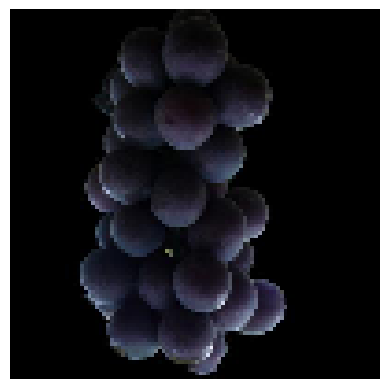

In [5]:
img = load_img(train_path + "/kyoho/kyoho (100).jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
images = ['champagne','concord' ,'cotton candy', 'crimson seedless', 'gewurztraminer', 'glenora', 'kyoho']
images1 = ['champagne','concord' ,'cottoncandy', 'crismon seedless', 'gewurztraminer', 'glenora', 'kyoho']

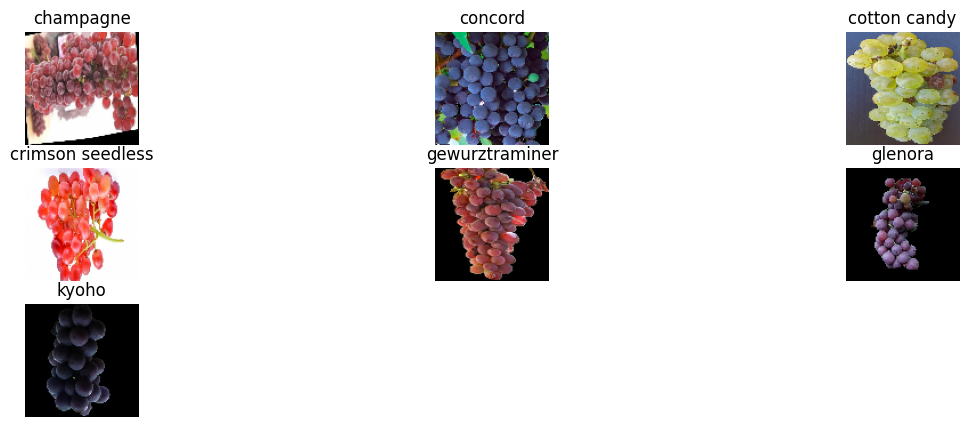

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(15,5))
for i in range(7):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    #fig.patch.set_facecolor('#E53090')
    #Above code adds a background color for subplots you can change the hex color code as you wish
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + "/"+ images[i] +"/"+images1[i] + " (100).jpg", target_size=(100,100)))

In [9]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [10]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

7


In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))

In [12]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [14]:
batch_size = 32

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 995 images belonging to 7 classes.
Found 735 images belonging to 7 classes.


In [16]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 1000 // batch_size,
                   epochs = 35,
                   validation_data = test_generator,
                   validation_steps = 740 // batch_size)

<ipython-input-16-5b02b46123f3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/35
31/31 [==============================] - 872s 28s/step - loss: 1.5477 - accuracy: 0.3873 - val_loss: 0.9671 - val_accuracy: 0.7061
Epoch 2/35
31/31 [==============================] - 20s 641ms/step - loss: 0.8755 - accuracy: 0.6542 - val_loss: 1.0905 - val_accuracy: 0.5701
Epoch 3/35
31/31 [==============================] - 23s 752ms/step - loss: 0.6732 - accuracy: 0.7425 - val_loss: 0.3594 - val_accuracy: 0.8925
Epoch 4/35
31/31 [==============================] - 21s 678ms/step - loss: 0.5159 - accuracy: 0.8006 - val_loss: 0.4714 - val_accuracy: 0.8136
Epoch 5/35
31/31 [==============================] - 21s 680ms/step - loss: 0.4059 - accuracy: 0.8494 - val_loss: 0.6932 - val_accuracy: 0.7020
Epoch 6/35
31/31 [==============================] - 21s 669ms/step - loss: 0.3667 - accuracy: 0.8588 - val_loss: 0.2152 - val_accuracy: 0.9184
Epoch 7/35
31/31 [==============================] - 20s 643ms/step - loss: 0.2949 - accuracy: 0.9065 - val_loss: 0.1432 - val_accuracy: 0.9483


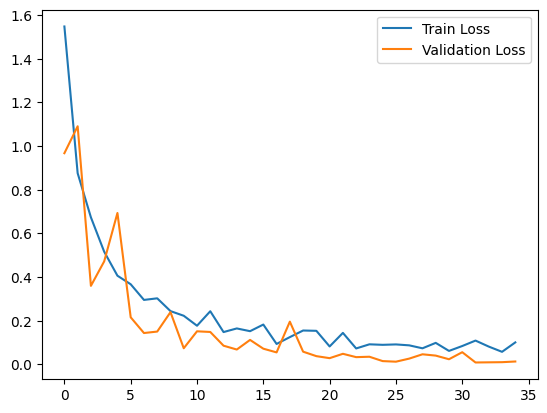

In [17]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

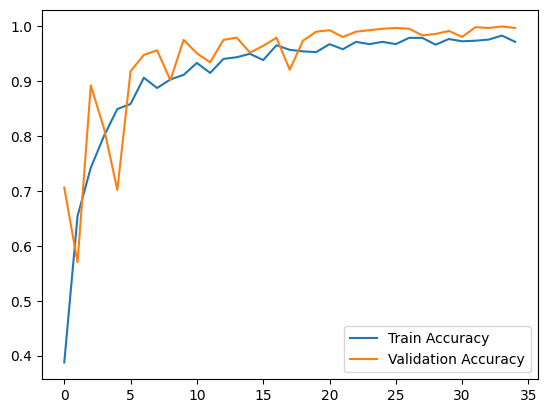

In [18]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [19]:
# Predict the label of the test_images
pred = model.predict(test_generator)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

23/23 [==============================] - 8s 346ms/step


['champagne',
 'champagne',
 'glenora',
 'crimson seedless',
 'kyoho',
 'glenora',
 'kyoho',
 'cotton candy',
 'glenora',
 'cotton candy',
 'cotton candy',
 'kyoho',
 'glenora',
 'glenora',
 'champagne',
 'glenora',
 'champagne',
 'champagne',
 'gewurztraminer',
 'kyoho',
 'kyoho',
 'glenora',
 'glenora',
 'glenora',
 'gewurztraminer',
 'kyoho',
 'glenora',
 'champagne',
 'crimson seedless',
 'kyoho',
 'kyoho',
 'glenora',
 'glenora',
 'champagne',
 'concord',
 'kyoho',
 'cotton candy',
 'kyoho',
 'cotton candy',
 'cotton candy',
 'champagne',
 'gewurztraminer',
 'cotton candy',
 'glenora',
 'glenora',
 'kyoho',
 'glenora',
 'kyoho',
 'glenora',
 'kyoho',
 'glenora',
 'cotton candy',
 'cotton candy',
 'glenora',
 'gewurztraminer',
 'glenora',
 'kyoho',
 'champagne',
 'gewurztraminer',
 'kyoho',
 'concord',
 'gewurztraminer',
 'cotton candy',
 'crimson seedless',
 'glenora',
 'gewurztraminer',
 'concord',
 'champagne',
 'gewurztraminer',
 'glenora',
 'gewurztraminer',
 'champagne',
 'co

In [20]:
def output(location):
    img=load_img(location,target_size=(100,100,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer = model.predict(img)
    answer2 = answer[0]
    y_class = answer.argmax(axis=-1)
    array = np.asarray(answer2)
    idx = (np.abs(array-1)).argmin()
    acc = array[idx]
    print(y_class)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    print(res)
    print(acc)
    return res

# Mục mới

In [21]:
img = output('/content/drive/MyDrive/XuLiAnhSo/aa.jpg')
img

1/1 [==============================] - 0s 213ms/step
[5]
glenora
0.99997294


'glenora'

In [22]:
model.save('models.h5')